# Reorganizing ONet datasets

The O\*Net database (found at https://www.onetcenter.org/database.html) contains info on the required skills, abilities, and knowledge for 967 occupations in the United States. There are 120 elements (skills, abilities, knowledge areas) rated in total, and each element is rated on Importance (how significant the area is for the job) and Level (to what extent someone in that job needs to be good at the element).

Currently, this information is contained in three separate files (for skills, abilities, and knowledge). Also, each file is extremely long. More specifically, each triple of occupation, element, and (Importance or Level) is given its own line.

In this notebook, I will combine the three files into a single DataFrame. This DataFrame will have 967 rows (one for each occupation) and 240 columns (one for each element and (Level or Importance)). This will enable us to represent each job as a 240-dimensional vector.

The O\*Net program is the nation's primary resource on occupational information. The Occupational Information Network (O\*NET) is developed under the sponsorship of the U.S. Department of Labor/Employment and Training Administration (USDOL/ETA) through a grant to the North Carolina Department of Commerce. 

In [1]:
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns',100)

import numpy as np

## Form of Skills dataset

In [2]:
#skills for 967 occupations
skills = pd.read_excel('Skills.xlsx')

In [3]:
skills.columns

Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Data Value', 'N', 'Standard Error', 'Lower CI Bound',
       'Upper CI Bound', 'Recommend Suppress', 'Not Relevant', 'Date',
       'Domain Source'],
      dtype='object')

In [4]:
skills.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
1,11-1011.00,Chief Executives,2.A.1.a,Reading Comprehension,LV,Level,4.75,8.0,0.16,4.43,5.07,N,N,07/2014,Analyst
2,11-1011.00,Chief Executives,2.A.1.b,Active Listening,IM,Importance,4.12,8.0,0.13,3.88,4.37,N,NaN,07/2014,Analyst
3,11-1011.00,Chief Executives,2.A.1.b,Active Listening,LV,Level,4.88,8.0,0.23,4.43,5.32,N,N,07/2014,Analyst
4,11-1011.00,Chief Executives,2.A.1.c,Writing,IM,Importance,4.00,8.0,0.00,4.00,4.00,N,NaN,07/2014,Analyst


In [5]:
print('Number of columns: {}'.format(skills.shape[1]))
print('Number of rows: {}'.format(skills.shape[0]))

Number of columns: 15
Number of rows: 67690


In [6]:
distinct_skills = set(skills.loc[:,'Element Name'])

print(len(distinct_skills))

distinct_skills

35


{'Active Learning',
 'Active Listening',
 'Complex Problem Solving',
 'Coordination',
 'Critical Thinking',
 'Equipment Maintenance',
 'Equipment Selection',
 'Installation',
 'Instructing',
 'Judgment and Decision Making',
 'Learning Strategies',
 'Management of Financial Resources',
 'Management of Material Resources',
 'Management of Personnel Resources',
 'Mathematics',
 'Monitoring',
 'Negotiation',
 'Operation Monitoring',
 'Operation and Control',
 'Operations Analysis',
 'Persuasion',
 'Programming',
 'Quality Control Analysis',
 'Reading Comprehension',
 'Repairing',
 'Science',
 'Service Orientation',
 'Social Perceptiveness',
 'Speaking',
 'Systems Analysis',
 'Systems Evaluation',
 'Technology Design',
 'Time Management',
 'Troubleshooting',
 'Writing'}

In [7]:
skills_counts = skills.groupby('O*NET-SOC Code')['O*NET-SOC Code'].count()

skills_counts.value_counts() #check that every skill occurs exactly twice

70    967
Name: O*NET-SOC Code, dtype: int64

## Form of Knowledge dataset

In [8]:
knowledge = pd.read_excel('knowledge.xlsx')

In [9]:
print('Number of columns: {}'.format(knowledge.shape[1]))
print('Number of rows: {}'.format(knowledge.shape[0]))

knowledge.head()

Number of columns: 15
Number of rows: 63822


,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,2.C.1.a,Administration and Management,IM,Importance,4.75,27.0,0.09,4.56,4.94,N,NaN,07/2014,Incumbent
1,11-1011.00,Chief Executives,2.C.1.a,Administration and Management,LV,Level,6.23,27.0,0.17,5.88,6.57,N,N,07/2014,Incumbent
2,11-1011.00,Chief Executives,2.C.1.b,Clerical,IM,Importance,2.66,27.0,0.22,2.21,3.11,N,NaN,07/2014,Incumbent
3,11-1011.00,Chief Executives,2.C.1.b,Clerical,LV,Level,3.50,27.0,0.41,2.66,4.34,N,N,07/2014,Incumbent
4,11-1011.00,Chief Executives,2.C.1.c,Economics and Accounting,IM,Importance,3.70,27.0,0.28,3.11,4.28,N,NaN,07/2014,Incumbent


In [10]:
different_knows = set(knowledge.loc[:,'Element Name'])

print(len(different_knows))

(different_knows)

33


{'Administration and Management',
 'Biology',
 'Building and Construction',
 'Chemistry',
 'Clerical',
 'Communications and Media',
 'Computers and Electronics',
 'Customer and Personal Service',
 'Design',
 'Economics and Accounting',
 'Education and Training',
 'Engineering and Technology',
 'English Language',
 'Fine Arts',
 'Food Production',
 'Foreign Language',
 'Geography',
 'History and Archeology',
 'Law and Government',
 'Mathematics',
 'Mechanical',
 'Medicine and Dentistry',
 'Personnel and Human Resources',
 'Philosophy and Theology',
 'Physics',
 'Production and Processing',
 'Psychology',
 'Public Safety and Security',
 'Sales and Marketing',
 'Sociology and Anthropology',
 'Telecommunications',
 'Therapy and Counseling',
 'Transportation'}

In [11]:
knowledge_counts = knowledge.groupby('O*NET-SOC Code')['O*NET-SOC Code'].count()

knowledge_counts.value_counts() #every knowledge category occurs exactly twice

66    967
Name: O*NET-SOC Code, dtype: int64

## Form of Education, Training, and Experience dataset

I originally considered using this dataset on the required Education, Training, and Experience required for occupations. I decided against it though because it seemed difficult to compare the different levels of required education.

In [12]:
education_training_experience = pd.read_excel('Education, Training, and Experience.xlsx')

In [13]:
print('Number of columns: {}'.format(education_training_experience.shape[1]))
print('Number of rows: {}'.format(education_training_experience.shape[0]))

education_training_experience.head()

Number of columns: 15
Number of rows: 39693


,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Category,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Date,Domain Source
0,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),1.0,0.00,27,0.00,NaN,NaN,N,07/2014,Incumbent
1,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),2.0,0.00,27,0.00,NaN,NaN,N,07/2014,Incumbent
2,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),3.0,0.00,27,0.00,NaN,NaN,N,07/2014,Incumbent
3,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),4.0,6.05,27,4.43,1.28,24.19,N,07/2014,Incumbent
4,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),5.0,4.23,27,4.27,0.50,27.80,N,07/2014,Incumbent


In [14]:
different_trainings = set(education_training_experience.loc[:,'Element Name'])

print('Number of different training categories: {}'.format(len(different_trainings)))

print(different_trainings)

Number of different training categories: 6
{'Required Level of Education', 'Job-Related Professional Certification', 'On-Site or In-Plant Training', 'Related Work Experience', 'Apprenticeship', 'On-the-Job Training'}


In [15]:
#category descriptions of Education, Training, and Experience file
education_training_experience_categories = pd.read_excel('Education, Training, and Experience Categories.xlsx')

In [16]:
education_training_experience_categories

,Element ID,Element Name,Scale ID,Scale Name,Category,Category Description
0,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),1,Less than a High School Diploma
1,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),2,High School Diploma - or the equivalent (for e...
2,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),3,Post-Secondary Certificate - awarded for train...
3,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),4,Some College Courses
4,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),5,Associate's Degree (or other 2-year degree)
5,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),6,Bachelor's Degree
6,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),7,Post-Baccalaureate Certificate - awarded for c...
7,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),8,Master's Degree
8,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),9,Post-Master's Certificate - awarded for comple...
9,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),10,First Professional Degree - awarded for comple...


## Form of Abilities dataset

In [17]:
abilities = pd.read_excel('Abilities.xlsx')

In [18]:
print('Number of columns: {}'.format(abilities.shape[1]))
print('Number of rows: {}'.format(abilities.shape[0]))

abilities.head()

Number of columns: 15
Number of rows: 100568


,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,IM,Importance,4.50,8.0,0.19,4.13,4.87,N,NaN,07/2014,Analyst
1,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,LV,Level,4.88,8.0,0.13,4.63,5.12,N,N,07/2014,Analyst
2,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,IM,Importance,4.25,8.0,0.16,3.93,4.57,N,NaN,07/2014,Analyst
3,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,LV,Level,4.62,8.0,0.18,4.27,4.98,N,N,07/2014,Analyst
4,11-1011.00,Chief Executives,1.A.1.a.3,Oral Expression,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst


In [19]:
different_abilities = set(abilities.loc[:,'Element Name'])

print('Number of abilities: {}'.format(len(different_abilities)))

print(different_abilities)

Number of abilities: 52
{'Problem Sensitivity', 'Memorization', 'Category Flexibility', 'Gross Body Equilibrium', 'Sound Localization', 'Rate Control', 'Manual Dexterity', 'Spatial Orientation', 'Speed of Closure', 'Far Vision', 'Near Vision', 'Information Ordering', 'Speech Recognition', 'Gross Body Coordination', 'Reaction Time', 'Glare Sensitivity', 'Hearing Sensitivity', 'Dynamic Flexibility', 'Perceptual Speed', 'Inductive Reasoning', 'Control Precision', 'Response Orientation', 'Oral Comprehension', 'Wrist-Finger Speed', 'Multilimb Coordination', 'Deductive Reasoning', 'Peripheral Vision', 'Explosive Strength', 'Auditory Attention', 'Extent Flexibility', 'Number Facility', 'Speech Clarity', 'Oral Expression', 'Speed of Limb Movement', 'Dynamic Strength', 'Selective Attention', 'Written Expression', 'Flexibility of Closure', 'Night Vision', 'Static Strength', 'Originality', 'Trunk Strength', 'Fluency of Ideas', 'Mathematical Reasoning', 'Depth Perception', 'Visual Color Discrimina

In [20]:
#find how many abilities listed per occupation

abilities_counts = abilities.groupby('O*NET-SOC Code')['O*NET-SOC Code'].count()

#check that every ability occurs exactly twice
abilities_counts.value_counts() 

104    967
Name: O*NET-SOC Code, dtype: int64

## Form of Tools and Technology dataset

I initially also considered using this dataset on the Tools and Technologies required for occupations. I thought it would be good to include if software, like R or SQL knowledge, was necessary. However, there were way too many tools and technologies, so I decided against it.

In [21]:
tools_technology = pd.read_excel('Tools and Technology.xlsx')

In [22]:
print('Number of rows: {}'.format(tools_technology.shape[0]))
print('Number of columns: {}'.format(tools_technology.shape[1]))

tools_technology.head()

Number of rows: 68230
Number of columns: 7


,O*NET-SOC Code,Title,T2 Type,T2 Example,Commodity Code,Commodity Title,Hot Technology
0,11-1011.00,Chief Executives,Tools,10-key calculators,44101809,Desktop calculator,N
1,11-1011.00,Chief Executives,Tools,Desktop computers,43211507,Desktop computers,N
2,11-1011.00,Chief Executives,Tools,Laptop computers,43211503,Notebook computers,N
3,11-1011.00,Chief Executives,Tools,Personal computers,43211508,Personal computers,N
4,11-1011.00,Chief Executives,Tools,Personal digital assistants PDA,43211504,Personal digital assistant PDAs or organizers,N


In [23]:
#all tools and technologies described in dataset
different_tools_technology = set(tools_technology.loc[:,'Commodity Title'])

print(len(different_tools_technology))
print(different_tools_technology)

4307
{'Aquariums', 'Bacterial removal equipment', 'Power flaring tool', 'Compressed air gun', 'Creep testers', 'Loud speaker stand', 'Camera based vision systems for automated data collection', 'Dump trucks', 'Sampling pumps', 'Gear cutting tool', 'Spirometers or its accessories or its supplies', 'Anaerobic chamber', 'Variable message sign', 'Sanding blocks', 'Medical x ray intensifying screens', 'Water meters', 'Phase modulation circuit', 'Conveyor idlers', 'Body composition analyzer', 'Hydroelectric engines', 'Front end loaders', 'Tongs', 'Threading taps', 'Snowmobiles or snow scooter', 'Lockout devices', 'Domestic pizza cutters', 'Rolling press', 'Snowboards', 'Fire tube boilers', 'Compression testers', 'Photometers', 'Medical magnetic resonance imaging MRI primary or remote or secondary consoles', 'Materials requirements planning logistics and supply chain software', 'Touch pads', 'Reamer', 'Dental scissors', 'Rail joint gap gauge', 'Sludge collectors', 'Hose cutter', 'Clutch repai

## Check consistency of form of Skills, Knowledge, and Abilities datasets

I settled on using these three files to understand how different occupations compare. 

One issue with these datasets is that some occupations might have many reporters compared to others, i.e., some sample sizes may be larger than others. We will find that the Skills and Abilities datasets are consistent, in that every occupation and element name has been reviewed at least three times. For the Knowledge dataset, each occupation has been rated between 13 and 65 times. 

I will not actually use these sample sizes in the future, except to implicitly declare that we can trust these datasets to accurately understand and compare job titles.

In [24]:
#find that each occupation has been rated in every skills exactly 8 times

#pick one row for each occupation
skills_oral_comprehension = skills[(skills['Element Name'] == 'Reading Comprehension') 
                                   & (skills['Scale Name'] == 'Importance')]

print('Number of occupations: {}'.format(skills_oral_comprehension.shape[0]))

#find that each occupation has 8 occurrences
skills_oral_comprehension.loc[:,'N'].value_counts()

Number of occupations: 967


8.0    966
Name: N, dtype: int64

In [25]:
#there is one nan
skills_oral_comprehension[skills_oral_comprehension.loc[:,'N'].isnull()]

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
9660,15-2091.00,Mathematical Technicians,2.A.1.a,Reading Comprehension,IM,Importance,4.33,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst


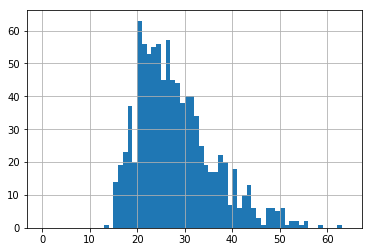

In [26]:
#Distribution for survey sample sizes for knowledge of different occupations

knowledge_administration_importance = knowledge[(knowledge['Element Name'] == 'Administration and Management') 
                                                & (knowledge['Scale Name'] == 'Importance') ]

knowledge_administration_importance.loc[:,'N'].hist(bins=range(0,65,1))

In [28]:
abilities_oral_importance = abilities[(abilities['Element Name'] == 'Oral Comprehension') & (abilities['Scale Name'] == 'Importance')]

abilities_oral_importance.loc[:,'N'].value_counts()

8.0    966
Name: N, dtype: int64

## Reorganizing skills dataset

I now want reorganize each of my Skills, Abilities, and Knowledge.
Each row will represent a different title. For each element name of Skills, Abilities, and Knowledge will be two columns. These columns will list the Important and Level of that element name. An example of a column name is "skills_oralcomprehension_importance" which will list the various importance ratings of Oral Comprehension in the Skills file.

Other columns include the "O\*NET-SOC Code", "Title" (name of job title), and the sample sizes for Skills, Abilities, and Knowledge.

I will start with the skills dataset. I first will do some tests to check:
1. The skills are listed in the same order for every occupation;
2. Importance and Level are always alternating.

In [29]:
#number of distinct skills
num_skills = len(distinct_skills) #35

#number of distinct job titles 
num_occupations = len(set(skills.loc[:,'Title'])) #967

In [30]:
#check that skills are in same order every time

#make list of series skill ID's of job titles
skill_ids_series_list = [tuple(skills.loc[idx*2*num_skills: (idx+1)*2*num_skills-1,'Element ID']) 
                       for idx in range(num_occupations)]

assert(len(set(skills_ids_series_list)) == 1)

In [31]:
#check that "Importance" and "Level" are alternating in "Scale Name" column
for idx in range(int(skills.shape[0]/2)):
    assert(tuple(skills.loc[2*idx:2*idx+1,'Scale Name']) == ('Importance','Level'))

In [35]:
#each row is an occupation
#each column is a skill/(Importance or Level)
skills_reshape = pd.DataFrame(skills.loc[:,'Data Value']\
                              .values.reshape(num_occupations,2*num_skills))

In [36]:
skills_reshape.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69
0,4.12,4.75,4.12,4.88,4.00,4.38,4.38,4.88,3.25,3.62,1.88,1.12,4.38,4.75,4.00,4.75,3.12,3.88,4.12,5.50,4.25,4.25,4.25,5.12,4.12,5.00,4.12,4.62,3.12,3.88,3.12,3.38,4.38,5.00,3.12,4.25,1.75,0.75,1.12,0.62,1.0,0.0,1.62,0.62,1.88,1.62,1.75,1.50,1.0,0.0,1.00,0.00,1.0,0.0,1.75,1.00,4.50,5.75,4.12,5.38,4.12,5.12,4.00,4.75,4.12,5.50,3.88,4.75,4.25,5.38
1,4.00,4.25,3.88,4.12,3.88,4.38,4.00,4.25,2.75,3.38,1.75,1.50,4.00,4.12,3.50,3.75,3.38,3.50,3.62,4.12,3.75,3.62,3.62,3.75,3.62,3.88,2.88,3.25,3.25,3.38,3.25,3.38,4.00,4.25,2.62,3.38,1.62,1.00,1.12,0.50,1.0,0.0,1.62,0.88,2.25,2.12,1.62,1.25,1.0,0.0,1.12,0.12,1.0,0.0,2.25,2.12,3.75,3.75,3.62,3.88,3.62,3.75,3.38,3.50,2.62,3.38,2.38,2.62,3.38,3.75
2,3.88,4.00,4.00,4.00,3.25,3.88,4.00,4.00,2.38,2.50,1.88,1.12,3.88,4.00,3.50,3.62,3.00,3.25,4.00,4.00,4.00,4.00,4.00,3.88,3.38,3.50,3.62,3.62,3.12,3.25,3.25,3.12,3.50,3.75,2.75,3.12,1.88,1.12,1.00,0.00,1.0,0.0,1.50,0.62,2.75,2.62,2.00,1.75,1.0,0.0,2.00,1.38,1.0,0.0,2.38,2.12,3.50,3.75,3.00,3.00,3.00,3.12,3.75,3.75,3.12,3.38,3.25,3.25,3.50,3.88
3,3.75,4.00,4.12,4.12,3.75,3.88,4.00,4.12,3.00,3.25,1.62,0.62,4.00,4.12,3.25,4.12,3.00,3.25,3.25,4.25,4.00,4.00,3.50,4.12,3.38,3.88,3.12,3.75,2.88,3.00,3.12,3.25,3.50,3.88,2.75,3.12,1.75,0.75,1.12,0.12,1.0,0.0,1.75,0.75,1.62,0.62,1.00,0.00,1.0,0.0,1.00,0.00,1.0,0.0,1.62,1.00,3.75,4.00,3.12,3.12,3.12,3.75,3.50,3.88,2.75,3.62,2.62,2.62,3.12,3.88
4,3.88,4.25,3.88,4.12,3.25,3.88,3.88,4.12,2.75,3.12,1.75,1.50,3.88,4.25,3.88,4.12,3.12,3.50,3.75,4.25,3.88,4.00,3.50,3.75,3.75,4.38,3.62,3.88,3.00,3.50,3.12,3.25,3.62,3.88,3.38,3.62,1.75,0.88,1.00,0.00,1.0,0.0,1.88,1.25,1.75,1.25,1.00,0.00,1.0,0.0,1.00,0.00,1.0,0.0,1.88,1.38,3.75,4.00,3.25,3.75,3.50,3.75,3.50,3.75,2.88,3.75,2.62,2.75,3.38,3.88


In [37]:
#list of skills (multiplicity 2)
skills_in_pairs = list(skills.loc[:2*num_skills-1, 'Element Name'])
importance_level_skills_alternating = ['Importance','Level'] * num_skills

In [38]:
skills_reshape.columns = ['skill {} {}'.format(skills_in_pairs[idx], 
                                               importance_level_skills_alternating[idx]) 
                          for idx in range(2*num_skills)]

In [39]:
skills_reshape.index = skills.loc[:,'Title'].drop_duplicates()
skills_reshape = skills_reshape.reset_index()

In [40]:
#check that each skill and occupation was analyzed with sample size of 8
skills.loc[:,'N'].value_counts()

8.0    67620
Name: N, dtype: int64

In [41]:
#make column of sample size
skills_reshape.loc[:,'skills_N'] = skills_reshape.apply(lambda x: 8, axis=1)

In [42]:
skills_reshape.head()

,Title,skill Reading Comprehension Importance,skill Reading Comprehension Level,skill Active Listening Importance,skill Active Listening Level,skill Writing Importance,skill Writing Level,skill Speaking Importance,skill Speaking Level,skill Mathematics Importance,skill Mathematics Level,skill Science Importance,skill Science Level,skill Critical Thinking Importance,skill Critical Thinking Level,skill Active Learning Importance,skill Active Learning Level,skill Learning Strategies Importance,skill Learning Strategies Level,skill Monitoring Importance,skill Monitoring Level,skill Social Perceptiveness Importance,skill Social Perceptiveness Level,skill Coordination Importance,skill Coordination Level,skill Persuasion Importance,skill Persuasion Level,skill Negotiation Importance,skill Negotiation Level,skill Instructing Importance,skill Instructing Level,skill Service Orientation Importance,skill Service Orientation Level,skill Complex Problem Solving Importance,skill Complex Problem Solving Level,skill Operations Analysis Importance,skill Operations Analysis Level,skill Technology Design Importance,skill Technology Design Level,skill Equipment Selection Importance,skill Equipment Selection Level,skill Installation Importance,skill Installation Level,skill Programming Importance,skill Programming Level,skill Operation Monitoring Importance,skill Operation Monitoring Level,skill Operation and Control Importance,skill Operation and Control Level,skill Equipment Maintenance Importance,skill Equipment Maintenance Level,skill Troubleshooting Importance,skill Troubleshooting Level,skill Repairing Importance,skill Repairing Level,skill Quality Control Analysis Importance,skill Quality Control Analysis Level,skill Judgment and Decision Making Importance,skill Judgment and Decision Making Level,skill Systems Analysis Importance,skill Systems Analysis Level,skill Systems Evaluation Importance,skill Systems Evaluation Level,skill Time Management Importance,skill Time Management Level,skill Management of Financial Resources Importance,skill Management of Financial Resources Level,skill Management of Material Resources Importance,skill Management of Material Resources Level,skill Management of Personnel Resources Importance,skill Management of Personnel Resources Level,skills_N
0,Chief Executives,4.12,4.75,4.12,4.88,4.00,4.38,4.38,4.88,3.25,3.62,1.88,1.12,4.38,4.75,4.00,4.75,3.12,3.88,4.12,5.50,4.25,4.25,4.25,5.12,4.12,5.00,4.12,4.62,3.12,3.88,3.12,3.38,4.38,5.00,3.12,4.25,1.75,0.75,1.12,0.62,1.0,0.0,1.62,0.62,1.88,1.62,1.75,1.50,1.0,0.0,1.00,0.00,1.0,0.0,1.75,1.00,4.50,5.75,4.12,5.38,4.12,5.12,4.00,4.75,4.12,5.50,3.88,4.75,4.25,5.38,8
1,Chief Sustainability Officers,4.00,4.25,3.88,4.12,3.88,4.38,4.00,4.25,2.75,3.38,1.75,1.50,4.00,4.12,3.50,3.75,3.38,3.50,3.62,4.12,3.75,3.62,3.62,3.75,3.62,3.88,2.88,3.25,3.25,3.38,3.25,3.38,4.00,4.25,2.62,3.38,1.62,1.00,1.12,0.50,1.0,0.0,1.62,0.88,2.25,2.12,1.62,1.25,1.0,0.0,1.12,0.12,1.0,0.0,2.25,2.12,3.75,3.75,3.62,3.88,3.62,3.75,3.38,3.50,2.62,3.38,2.38,2.62,3.38,3.75,8
2,General and Operations Managers,3.88,4.00,4.00,4.00,3.25,3.88,4.00,4.00,2.38,2.50,1.88,1.12,3.88,4.00,3.50,3.62,3.00,3.25,4.00,4.00,4.00,4.00,4.00,3.88,3.38,3.50,3.62,3.62,3.12,3.25,3.25,3.12,3.50,3.75,2.75,3.12,1.88,1.12,1.00,0.00,1.0,0.0,1.50,0.62,2.75,2.62,2.00,1.75,1.0,0.0,2.00,1.38,1.0,0.0,2.38,2.12,3.50,3.75,3.00,3.00,3.00,3.12,3.75,3.75,3.12,3.38,3.25,3.25,3.50,3.88,8
3,Advertising and Promotions Managers,3.75,4.00,4.12,4.12,3.75,3.88,4.00,4.12,3.00,3.25,1.62,0.62,4.00,4.12,3.25,4.12,3.00,3.25,3.25,4.25,4.00,4.00,3.50,4.12,3.38,3.88,3.12,3.75,2.88,3.00,3.12,3.25,3.50,3.88,2.75,3.12,1.75,0.75,1.12,0.12,1.0,0.0,1.75,0.75,1.62,0.62,1.00,0.00,1.0,0.0,1.00,0.00,1.0,0.0,1.62,1.00,3.75,4.00,3.12,3.12,3.12,3.75,3.50,3.88,2.75,3.62,2.62,2.62,3.12,3.88,8
4,Marketing Managers,3.88,4.25,3.88,4.12,3.25,3.88,3.88,4.12,2.75,3.12,1.75,1.50,3.88,4.25,3.88,4.12,3.12,3.50,3.75,4.25,3.88,4.00,3.50,3.75,3.75,4.38,3.62,3.88,3.00,3.50,3.12,3.25,3.62,3.88

## Reorganizing abilities dataset

I will perform the same tests as I did for skills, except I will also check that the occupations for skills and abilities are the same and occur in the same order.

I will then reorganize the abilities into a dataset, similar to what I did with skills.

In [43]:
abilities.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,IM,Importance,4.50,8.0,0.19,4.13,4.87,N,NaN,07/2014,Analyst
1,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,LV,Level,4.88,8.0,0.13,4.63,5.12,N,N,07/2014,Analyst
2,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,IM,Importance,4.25,8.0,0.16,3.93,4.57,N,NaN,07/2014,Analyst
3,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,LV,Level,4.62,8.0,0.18,4.27,4.98,N,N,07/2014,Analyst
4,11-1011.00,Chief Executives,1.A.1.a.3,Oral Expression,IM,Importance,4.38,8.0,0.18,4.02,4.73,N,NaN,07/2014,Analyst


In [45]:
#check that sets of occupations for skills and abilities are the same
set(skills.loc[:,'Title']) == set(abilities.loc[:,'Title'])

True

In [46]:
#check that occupations for skills and abilities occur in same order
tuple(skills.loc[:,'Title'].drop_duplicates()) == tuple(abilities.loc[:,'Title'].drop_duplicates())

True

In [47]:
num_abilities = len(set(abilities.loc[:,'Element Name'])) #52

In [48]:
#check that number of rows abilities equal 2 * num_abilities * num_occupations
abilities.shape[0] == 2 * num_abilities * num_occupations

True

In [49]:
#check that abilities occur in exact same order every time
len(set([tuple(abilities.loc[idx*num_abilities*2: (idx+1)*num_abilities*2-1,'Element Name']) for idx in range(num_occupations)]))

#Element Name cycles of length 2*num_abilities

1

In [50]:
#one row per occupation
#2 columns per ability (Level and Importance)
abilities_reshape = abilities.loc[:,'Data Value'].values.reshape(num_occupations, 2*num_abilities)

#convert back to DataFrame
abilities_reshape = pd.DataFrame(abilities_reshape)


In [51]:
print('Shape: {}'.format(abilities_reshape.shape))

abilities_reshape.head()

Shape: (967, 104)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103
0,4.5,4.88,4.25,4.62,4.38,5.00,4.12,4.62,3.88,4.62,3.88,4.25,4.00,5.00,4.12,5.00,4.00,5.00,3.62,4.00,3.50,4.12,3.38,3.88,3.25,4.12,3.00,3.12,3.12,3.38,3.38,3.50,3.12,2.88,1.12,0.12,3.12,3.88,3.00,3.12,3.00,2.88,1.00,0.00,1.00,0.00,2.25,2.00,1.75,1.12,...,1.00,0.00,1.00,0.00,1.00,0.00,1.0,0.00,1.0,0.00,1.0,0.00,1.00,0.00,1.00,0.00,1.0,0.0,1.00,0.0,1.0,0.0,1.00,0.00,1.0,0.00,3.88,4.50,3.00,3.12,1.88,1.62,1.00,0.0,1.0,0.00,1.75,1.50,1.00,0.00,1.75,1.50,2.12,2.12,1.00,0.00,4.12,4.62,4.12,4.88
1,4.0,4.50,4.00,4.38,4.00,4.62,3.88,4.38,3.62,4.12,3.62,4.00,3.88,4.25,4.00,4.50,4.00,4.25,3.50,3.62,3.38,3.62,2.88,3.25,2.75,3.25,2.25,2.50,2.38,2.62,3.00,3.00,2.38,2.38,1.25,0.25,2.75,3.12,2.88,2.75,2.62,2.38,1.00,0.00,1.00,0.00,2.25,2.00,1.75,1.25,...,1.12,0.25,1.25,0.38,1.12,0.12,1.0,0.00,1.0,0.00,1.0,0.00,1.00,0.00,1.12,0.25,1.0,0.0,1.00,0.0,1.0,0.0,1.00,0.00,1.0,0.00,3.38,3.50,2.62,2.75,2.00,1.62,1.00,0.0,1.0,0.00,2.00,1.88,1.00,0.00,2.00,1.50,1.88,1.62,1.12,0.12,4.00,3.62,4.00,3.62
2,4.0,4.12,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.25,3.00,3.38,4.00,3.88,3.75,3.75,3.12,3.38,3.50,3.62,3.00,3.00,2.88,3.12,2.75,2.62,2.12,2.25,2.25,2.12,2.75,2.25,2.62,2.25,1.50,0.62,2.75,2.50,3.00,2.88,2.88,2.88,2.00,1.50,1.50,0.75,1.75,1.38,1.75,1.38,...,1.75,1.12,2.12,1.75,1.38,0.62,1.5,0.62,2.0,1.75,1.5,0.75,1.62,0.75,2.12,2.12,2.0,1.5,1.38,0.5,1.0,0.0,1.88,1.25,1.5,0.62,3.25,3.25,2.75,2.88,2.00,2.25,1.38,0.5,1.5,0.88,2.00,1.88,1.38,0.38,2.00,2.00,2.12,2.00,1.50,0.62,3.88,3.25,4.00,3.25
3,4.0,4.38,4.00,4.00,4.25,4.75,3.88,4.00,3.75,4.12,3.75,3.88,3.62,4.00,3.88,4.50,3.50,3.88,3.25,3.75,3.38,3.88,3.00,3.12,2.88,3.12,2.50,2.38,2.62,2.75,3.12,3.12,2.88,2.75,1.00,0.00,3.25,3.12,2.88,2.75,2.75,2.12,1.38,0.50,1.38,0.38,1.62,1.12,1.12,0.12,...,1.00,0.00,1.00,0.00,1.75,0.75,1.0,0.00,1.0,0.00,1.0,0.00,1.00,0.00,1.62,0.88,1.0,0.0,1.00,0.0,1.0,0.0,1.00,0.00,1.0,0.00,3.75,4.12,2.88,3.12,2.88,2.75,1.00,0.0,1.0,0.00,1.75,1.00,1.00,0.00,1.75,1.25,1.75,1.25,1.00,0.00,3.88,4.00,4.00,3.88
4,4.0,4.38,4.00,4.12,4.00,4.12,3.88,4.12,3.75,4.25,3.62,4.00,3.62,3.88,3.88,4.38,3.75,3.88,3.25,3.50,3.25,3.62,3.12,3.62,3.12,3.50,2.62,3.00,2.75,3.00,3.00,3.00,2.75,2.88,1.00,0.00,3.00,3.00,2.88,2.88,2.75,2.62,1.12,0.12,1.00,0.00,1.75,1.25,1.00,0.00,...,1.00,0.00,1.00,0.00,1.62,0.75,1.0,0.00,1.0,0.00,1.0,0.00,1.25,0.25,1.75,0.88,1.0,0.0,1.00,0.0,1.0,0.0,1.00,0.00,1.0,0.00,3.50,3.75,2.88,3.25,2.88,2.88,1.00,0.0,1.0,0.00,1.75,0.75,1.00,0.00,1.88,1.50,1.88,1.62,1.00,0.00,3.62,3.88,3.75,3.88


In [52]:
#fix column names
abilities_multiplicity_2 = abilities.loc[:103, 'Element Name']
scales_repeated = abilities.loc[:103,'Scale Name']

abilities_reshape.columns = ['abilities {} {}'.format(abilities_multiplicity_2[idx],
                                                      scales_repeated[idx])
                             for idx in range(104)]

abilities_reshape.head()

,abilities Oral Comprehension Importance,abilities Oral Comprehension Level,abilities Written Comprehension Importance,abilities Written Comprehension Level,abilities Oral Expression Importance,abilities Oral Expression Level,abilities Written Expression Importance,abilities Written Expression Level,abilities Fluency of Ideas Importance,abilities Fluency of Ideas Level,abilities Originality Importance,abilities Originality Level,abilities Problem Sensitivity Importance,abilities Problem Sensitivity Level,abilities Deductive Reasoning Importance,abilities Deductive Reasoning Level,abilities Inductive Reasoning Importance,abilities Inductive Reasoning Level,abilities Information Ordering Importance,abilities Information Ordering Level,abilities Category Flexibility Importance,abilities Category Flexibility Level,abilities Mathematical Reasoning Importance,abilities Mathematical Reasoning Level,abilities Number Facility Importance,abilities Number Facility Level,abilities Memorization Importance,abilities Memorization Level,abilities Speed of Closure Importance,abilities Speed of Closure Level,abilities Flexibility of Closure Importance,abilities Flexibility of Closure Level,abilities Perceptual Speed Importance,abilities Perceptual Speed Level,abilities Spatial Orientation Importance,abilities Spatial Orientation Level,abilities Visualization Importance,abilities Visualization Level,abilities Selective Attention Importance,abilities Selective Attention Level,abilities Time Sharing Importance,abilities Time Sharing Level,abilities Arm-Hand Steadiness Importance,abilities Arm-Hand Steadiness Level,abilities Manual Dexterity Importance,abilities Manual Dexterity Level,abilities Finger Dexterity Importance,abilities Finger Dexterity Level,abilities Control Precision Importance,abilities Control Precision Level,...,abilities Rate Control Importance,abilities Rate Control Level,abilities Reaction Time Importance,abilities Reaction Time Level,abilities Wrist-Finger Speed Importance,abilities Wrist-Finger Speed Level,abilities Speed of Limb Movement Importance,abilities Speed of Limb Movement Level,abilities Static Strength Importance,abilities Static Strength Level,abilities Explosive Strength Importance,abilities Explosive Strength Level,abilities Dynamic Strength Importance,abilities Dynamic Strength Level,abilities Trunk Strength Importance,abilities Trunk Strength Level,abilities Stamina Importance,abilities Stamina Level,abilities Extent Flexibility Importance,abilities Extent Flexibility Level,abilities Dynamic Flexibility Importance,abilities Dynamic Flexibility Level,abilities Gross Body Coordination Importance,abilities Gross Body Coordination Level,abilities Gross Body Equilibrium Importance,abilities Gross Body Equilibrium Level,abilities Near Vision Importance,abilities Near Vision Level,abilities Far Vision Importance,abilities Far Vision Level,abilities Visual Color Discrimination Importance,abilities Visual Color Discrimination Level,abilities Night Vision Importance,abilities Night Vision Level,abilities Peripheral Vision Importance,abilities Peripheral Vision Level,abilities Depth Perception Importance,abilities Depth Perception Level,abilities Glare Sensitivity Importance,abilities Glare Sensitivity Level,abilities Hearing Sensitivity Importance,abilities Hearing Sensitivity Level,abilities Auditory Attention Importance,abilities Auditory Attention Level,abilities Sound Localization Importance,abilities Sound Localization Level,abilities Speech Recognition Importance,abilities Speech Recognition Level,abilities Speech Clarity Importance,abilities Speech Clarity Level
0,4.5,4.88,4.25,4.62,4.38,5.00,4.12,4.62,3.88,4.62,3.88,4.25,4.00,5.00,4.12,5.00,4.00,5.00,3.62,4.00,3.50,4.12,3.38,3.88,3.25,4.12,3.00,3.12,3.12,3.38,3.38,3.50,3.12,2.88,1.12,0.12,3.12,3.88,3.00,3.12,3.00,2.88,1.00,0.00,1.00,0.00,2.25,2.00,1.75,1.12,...,1.00,0.00,1.00,0.00,1.00,0.00,1.0,0.00,1.0,0.00,1.0,0.00,1.00,0.00,1.00,0.00,1.0,0.0,1.00,0.0,1.0,0.0,

In [53]:
abilities_reshape.index = abilities.loc[:,'Title'].drop_duplicates()

abilities_reshape = abilities_reshape.reset_index()

In [54]:
abilities_reshape.head()

,Title,abilities Oral Comprehension Importance,abilities Oral Comprehension Level,abilities Written Comprehension Importance,abilities Written Comprehension Level,abilities Oral Expression Importance,abilities Oral Expression Level,abilities Written Expression Importance,abilities Written Expression Level,abilities Fluency of Ideas Importance,abilities Fluency of Ideas Level,abilities Originality Importance,abilities Originality Level,abilities Problem Sensitivity Importance,abilities Problem Sensitivity Level,abilities Deductive Reasoning Importance,abilities Deductive Reasoning Level,abilities Inductive Reasoning Importance,abilities Inductive Reasoning Level,abilities Information Ordering Importance,abilities Information Ordering Level,abilities Category Flexibility Importance,abilities Category Flexibility Level,abilities Mathematical Reasoning Importance,abilities Mathematical Reasoning Level,abilities Number Facility Importance,abilities Number Facility Level,abilities Memorization Importance,abilities Memorization Level,abilities Speed of Closure Importance,abilities Speed of Closure Level,abilities Flexibility of Closure Importance,abilities Flexibility of Closure Level,abilities Perceptual Speed Importance,abilities Perceptual Speed Level,abilities Spatial Orientation Importance,abilities Spatial Orientation Level,abilities Visualization Importance,abilities Visualization Level,abilities Selective Attention Importance,abilities Selective Attention Level,abilities Time Sharing Importance,abilities Time Sharing Level,abilities Arm-Hand Steadiness Importance,abilities Arm-Hand Steadiness Level,abilities Manual Dexterity Importance,abilities Manual Dexterity Level,abilities Finger Dexterity Importance,abilities Finger Dexterity Level,abilities Control Precision Importance,...,abilities Rate Control Importance,abilities Rate Control Level,abilities Reaction Time Importance,abilities Reaction Time Level,abilities Wrist-Finger Speed Importance,abilities Wrist-Finger Speed Level,abilities Speed of Limb Movement Importance,abilities Speed of Limb Movement Level,abilities Static Strength Importance,abilities Static Strength Level,abilities Explosive Strength Importance,abilities Explosive Strength Level,abilities Dynamic Strength Importance,abilities Dynamic Strength Level,abilities Trunk Strength Importance,abilities Trunk Strength Level,abilities Stamina Importance,abilities Stamina Level,abilities Extent Flexibility Importance,abilities Extent Flexibility Level,abilities Dynamic Flexibility Importance,abilities Dynamic Flexibility Level,abilities Gross Body Coordination Importance,abilities Gross Body Coordination Level,abilities Gross Body Equilibrium Importance,abilities Gross Body Equilibrium Level,abilities Near Vision Importance,abilities Near Vision Level,abilities Far Vision Importance,abilities Far Vision Level,abilities Visual Color Discrimination Importance,abilities Visual Color Discrimination Level,abilities Night Vision Importance,abilities Night Vision Level,abilities Peripheral Vision Importance,abilities Peripheral Vision Level,abilities Depth Perception Importance,abilities Depth Perception Level,abilities Glare Sensitivity Importance,abilities Glare Sensitivity Level,abilities Hearing Sensitivity Importance,abilities Hearing Sensitivity Level,abilities Auditory Attention Importance,abilities Auditory Attention Level,abilities Sound Localization Importance,abilities Sound Localization Level,abilities Speech Recognition Importance,abilities Speech Recognition Level,abilities Speech Clarity Importance,abilities Speech Clarity Level
0,Chief Executives,4.5,4.88,4.25,4.62,4.38,5.00,4.12,4.62,3.88,4.62,3.88,4.25,4.00,5.00,4.12,5.00,4.00,5.00,3.62,4.00,3.50,4.12,3.38,3.88,3.25,4.12,3.00,3.12,3.12,3.38,3.38,3.50,3.12,2.88,1.12,0.12,3.12,3.88,3.00,3.12,3.00,2.88,1.00,0.00,1.00,0.00,2.25,2.00,1.75,...,1.00,0.00,1.00,0.00,1.00,0.00,1.0,0.00,1.0,0.00,1.0,0.00,1.00,0.00,1.00,0.00,1.0,0.0,1.00,0.0,1.0,0.0,1.00,0.00,1.0,0.

In [55]:
#find that each sample is size 8, except for Math Technician, which has NaN for sample size
abilities.loc[:,'N'].value_counts()

8.0    100464
Name: N, dtype: int64

In [56]:
abilities[abilities.loc[:,'N'].apply(lambda x:str(x)) == 'nan']

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
14352,15-2091.00,Mathematical Technicians,1.A.1.a.1,Oral Comprehension,IM,Importance,3.2,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
14353,15-2091.00,Mathematical Technicians,1.A.1.a.1,Oral Comprehension,LV,Level,4.6,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
14354,15-2091.00,Mathematical Technicians,1.A.1.a.2,Written Comprehension,IM,Importance,2.6,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
14355,15-2091.00,Mathematical Technicians,1.A.1.a.2,Written Comprehension,LV,Level,3.2,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
14356,15-2091.00,Mathematical Technicians,1.A.1.a.3,Oral Expression,IM,Importance,3.4,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
14357,15-2091.00,Mathematical Technicians,1.A.1.a.3,Oral Expression,LV,Level,4.4,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
14358,15-2091.00,Mathematical Technicians,1.A.1.a.4,Written Expression,IM,Importance,2.0,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
14359,15-2091.00,Mathematical Technicians,1.A.1.a.4,Written Expression,LV,Level,2.2,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
14360,15-2091.00,Mathematical Technicians,1.A.1.b.1,Fluency of Ideas,IM,Importance,2.8,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst
14361,15-2091.00,Mathematical Technicians,1.A.1.b.1,Fluency of Ideas,LV,Level,3.4,NaN,NaN,NaN,NaN,NaN,NaN,03/2002,Legacy Analyst


In [57]:
#I'll assume this is a mistake, and set the sample size to 8 for all Titles
abilities_reshape.loc[:,'abilities_N'] = abilities_reshape.apply(lambda x: 8, axis=1)

In [58]:
abilities_reshape.head()

,Title,abilities Oral Comprehension Importance,abilities Oral Comprehension Level,abilities Written Comprehension Importance,abilities Written Comprehension Level,abilities Oral Expression Importance,abilities Oral Expression Level,abilities Written Expression Importance,abilities Written Expression Level,abilities Fluency of Ideas Importance,abilities Fluency of Ideas Level,abilities Originality Importance,abilities Originality Level,abilities Problem Sensitivity Importance,abilities Problem Sensitivity Level,abilities Deductive Reasoning Importance,abilities Deductive Reasoning Level,abilities Inductive Reasoning Importance,abilities Inductive Reasoning Level,abilities Information Ordering Importance,abilities Information Ordering Level,abilities Category Flexibility Importance,abilities Category Flexibility Level,abilities Mathematical Reasoning Importance,abilities Mathematical Reasoning Level,abilities Number Facility Importance,abilities Number Facility Level,abilities Memorization Importance,abilities Memorization Level,abilities Speed of Closure Importance,abilities Speed of Closure Level,abilities Flexibility of Closure Importance,abilities Flexibility of Closure Level,abilities Perceptual Speed Importance,abilities Perceptual Speed Level,abilities Spatial Orientation Importance,abilities Spatial Orientation Level,abilities Visualization Importance,abilities Visualization Level,abilities Selective Attention Importance,abilities Selective Attention Level,abilities Time Sharing Importance,abilities Time Sharing Level,abilities Arm-Hand Steadiness Importance,abilities Arm-Hand Steadiness Level,abilities Manual Dexterity Importance,abilities Manual Dexterity Level,abilities Finger Dexterity Importance,abilities Finger Dexterity Level,abilities Control Precision Importance,...,abilities Rate Control Level,abilities Reaction Time Importance,abilities Reaction Time Level,abilities Wrist-Finger Speed Importance,abilities Wrist-Finger Speed Level,abilities Speed of Limb Movement Importance,abilities Speed of Limb Movement Level,abilities Static Strength Importance,abilities Static Strength Level,abilities Explosive Strength Importance,abilities Explosive Strength Level,abilities Dynamic Strength Importance,abilities Dynamic Strength Level,abilities Trunk Strength Importance,abilities Trunk Strength Level,abilities Stamina Importance,abilities Stamina Level,abilities Extent Flexibility Importance,abilities Extent Flexibility Level,abilities Dynamic Flexibility Importance,abilities Dynamic Flexibility Level,abilities Gross Body Coordination Importance,abilities Gross Body Coordination Level,abilities Gross Body Equilibrium Importance,abilities Gross Body Equilibrium Level,abilities Near Vision Importance,abilities Near Vision Level,abilities Far Vision Importance,abilities Far Vision Level,abilities Visual Color Discrimination Importance,abilities Visual Color Discrimination Level,abilities Night Vision Importance,abilities Night Vision Level,abilities Peripheral Vision Importance,abilities Peripheral Vision Level,abilities Depth Perception Importance,abilities Depth Perception Level,abilities Glare Sensitivity Importance,abilities Glare Sensitivity Level,abilities Hearing Sensitivity Importance,abilities Hearing Sensitivity Level,abilities Auditory Attention Importance,abilities Auditory Attention Level,abilities Sound Localization Importance,abilities Sound Localization Level,abilities Speech Recognition Importance,abilities Speech Recognition Level,abilities Speech Clarity Importance,abilities Speech Clarity Level,abilities_N
0,Chief Executives,4.5,4.88,4.25,4.62,4.38,5.00,4.12,4.62,3.88,4.62,3.88,4.25,4.00,5.00,4.12,5.00,4.00,5.00,3.62,4.00,3.50,4.12,3.38,3.88,3.25,4.12,3.00,3.12,3.12,3.38,3.38,3.50,3.12,2.88,1.12,0.12,3.12,3.88,3.00,3.12,3.00,2.88,1.00,0.00,1.00,0.00,2.25,2.00,1.75,...,0.00,1.00,0.00,1.00,0.00,1.0,0.00,1.0,0.00,1.0,0.00,1.00,0.00,1.00,0.00,1.0,0.0,1.00,0.0,1.0,0.0,1.00,0.00,1.0,0.00,3.88,4.50,3.00,3.12,1.88

## Reorganizing knowledge dataset

I will do the same tests as I did for abilities, and then reorganize as I did for skills and abilities.

In [59]:
print(knowledge.shape)
knowledge.head(70)

(63822, 15)


,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,2.C.1.a,Administration and Management,IM,Importance,4.75,27.0,0.09,4.56,4.94,N,NaN,07/2014,Incumbent
1,11-1011.00,Chief Executives,2.C.1.a,Administration and Management,LV,Level,6.23,27.0,0.17,5.88,6.57,N,N,07/2014,Incumbent
2,11-1011.00,Chief Executives,2.C.1.b,Clerical,IM,Importance,2.66,27.0,0.22,2.21,3.11,N,NaN,07/2014,Incumbent
3,11-1011.00,Chief Executives,2.C.1.b,Clerical,LV,Level,3.50,27.0,0.41,2.66,4.34,N,N,07/2014,Incumbent
4,11-1011.00,Chief Executives,2.C.1.c,Economics and Accounting,IM,Importance,3.70,27.0,0.28,3.11,4.28,N,NaN,07/2014,Incumbent
5,11-1011.00,Chief Executives,2.C.1.c,Economics and Accounting,LV,Level,4.36,27.0,0.34,3.67,5.06,N,N,07/2014,Incumbent
6,11-1011.00,Chief Executives,2.C.1.d,Sales and Marketing,IM,Importance,3.23,27.0,0.49,2.21,4.25,N,NaN,07/2014,Incumbent
7,11-1011.00,Chief Executives,2.C.1.d,Sales and Marketing,LV,Level,3.90,27.0,0.61,2.65,5.16,N,N,07/2014,Incumbent
8,11-1011.00,Chief Executives,2.C.1.e,Customer and Personal Service,IM,Importance,4.09,27.0,0.33,3.40,4.78,N,NaN,07/2014,Incumbent
9,11-1011.00,Chief Executives,2.C.1.e,Customer and Personal Service,LV,Level,5.55,27.0,0.44,4.65,6.44,N,N,07/2014,Incumbent


In [60]:
#find number of titles

num_titles = len(set(knowledge.loc[:,'Title']))
num_titles

967

In [61]:
#check that knowledge titles are same as skills titles
set(skills.loc[:,'Title']) == set(knowledge.loc[:,'Title'])

True

In [62]:
#check that knowledge titles are in same order as skills titles
tuple(skills.loc[:,'Title'].drop_duplicates()) == tuple(knowledge.loc[:,'Title'].drop_duplicates())

True

In [63]:
#find number of knowledge areas
num_knowledges = len(set(knowledge.loc[:,'Element Name'])) #33

num_knowledges

33

In [64]:
#check that number of rows of knowledge equal 2 * num_knowledges * num_titles
knowledge.shape[0] == 2 * num_knowledges * num_titles

True

In [65]:
#check that abilities occur in exact same order every time
1 == len(set([tuple(knowledge.loc[idx*num_knowledges*2: (idx+1)*num_knowledges*2-1,'Element Name']) for idx in range(num_titles)]))

#Element Name cycles of length 2*num_abilities

True

In [66]:
#reshape knowledge Data Values into (num_titles by 2*num_knowledges) array
#one column for each knowledge area
#one row for each title
knowledge_reshape = knowledge.loc[:,'Data Value'].values.reshape(num_titles, 2*num_knowledges)

#convert back to DataFrame
knowledge_reshape = pd.DataFrame(knowledge_reshape)

knowledge_reshape.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,4.75,6.23,2.66,3.50,3.70,4.36,3.23,3.90,4.09,5.55,4.10,5.02,2.63,2.92,1.14,0.29,2.23,2.54,1.75,1.59,2.05,2.04,2.11,2.00,1.67,1.05,3.40,4.23,1.23,0.41,1.43,0.95,1.34,0.56,3.10,3.94,2.61,2.99,1.59,1.29,1.35,0.73,2.00,2.50,3.24,4.45,4.07,4.56,1.56,0.78,1.43,0.87,1.48,1.09,1.70,1.82,3.30,3.61,3.92,4.00,1.76,1.59,2.70,3.35,2.21,1.91
1,3.85,4.72,2.58,3.64,2.96,3.60,3.50,4.84,3.62,4.92,2.72,4.08,2.23,2.35,1.64,1.36,2.65,3.68,3.35,4.20,3.72,4.80,3.69,4.32,2.64,2.76,3.12,4.15,2.48,2.96,2.36,3.04,2.44,3.08,2.88,3.24,2.38,3.36,2.46,3.81,1.23,0.54,1.23,0.54,3.48,5.19,3.81,4.48,1.40,0.88,1.38,0.96,1.80,1.88,1.85,2.42,2.40,3.38,2.88,3.08,1.58,0.81,2.84,2.92,2.42,2.48
2,4.35,5.21,3.51,3.70,3.47,3.84,3.47,4.05,3.95,5.06,3.76,4.43,3.39,4.34,1.34,0.49,3.33,4.00,2.42,2.31,2.38,2.66,2.51,2.62,2.71,2.91,3.56,4.16,1.81,1.41,1.95,1.74,1.50,0.90,2.72,2.78,1.81,1.30,1.76,1.68,1.55,0.86,1.77,1.48,2.97,3.87,3.71,3.68,1.62,1.13,1.16,0.47,1.21,0.43,1.51,0.87,3.10,3.12,2.95,3.12,2.50,2.33,2.59,2.68,2.20,2.31
3,4.12,4.41,3.25,4.34,3.04,2.94,4.68,5.58,4.16,5.39,2.60,3.08,2.58,2.68,1.04,0.08,3.31,4.17,1.91,1.57,2.79,2.92,1.44,0.64,1.41,0.67,3.16,3.55,1.34,0.49,1.22,0.37,1.23,0.45,2.87,2.74,2.50,2.77,1.99,2.07,1.42,0.48,1.75,1.42,2.94,3.85,4.41,4.85,1.58,1.04,2.35,2.30,1.67,1.13,1.89,2.11,2.47,2.19,2.23,2.09,2.40,1.91,4.35,5.21,1.95,1.59
4,4.04,4.61,3.01,4.10,3.10,3.55,4.85,6.05,3.85,4.85,2.71,3.55,2.46,2.92,1.12,0.28,3.51,4.05,2.77,2.47,3.15,3.55,1.19,0.42,1.33,0.54,3.51,4.40,1.18,0.37,1.21,0.43,1.10,0.20,2.45,2.86,2.03,2.44,2.20,2.55,1.26,0.44,1.63,1.10,3.03,4.15,4.48,5.04,1.64,1.36,1.70,1.32,1.68,1.09,1.64,1.12,2.50,2.26,2.86,2.93,2.86,2.56,3.80,4.21,1.68,1.53


In [67]:
#change column names of knowledge_reshape df

knowledges_multiplicity_2 = knowledge.loc[:2*num_knowledges-1,'Element Name']
scales_repeated_knowledge = ['Importance', 'Level']*num_knowledges

knowledge_reshape.columns = ['knowledge {} {}'.format(knowledges_multiplicity_2[idx],
                                                      scales_repeated_knowledge[idx])
                            for idx in range(2*num_knowledges)]

knowledge_reshape.head()

,knowledge Administration and Management Importance,knowledge Administration and Management Level,knowledge Clerical Importance,knowledge Clerical Level,knowledge Economics and Accounting Importance,knowledge Economics and Accounting Level,knowledge Sales and Marketing Importance,knowledge Sales and Marketing Level,knowledge Customer and Personal Service Importance,knowledge Customer and Personal Service Level,knowledge Personnel and Human Resources Importance,knowledge Personnel and Human Resources Level,knowledge Production and Processing Importance,knowledge Production and Processing Level,knowledge Food Production Importance,knowledge Food Production Level,knowledge Computers and Electronics Importance,knowledge Computers and Electronics Level,knowledge Engineering and Technology Importance,knowledge Engineering and Technology Level,knowledge Design Importance,knowledge Design Level,knowledge Building and Construction Importance,knowledge Building and Construction Level,knowledge Mechanical Importance,knowledge Mechanical Level,knowledge Mathematics Importance,knowledge Mathematics Level,knowledge Physics Importance,knowledge Physics Level,knowledge Chemistry Importance,knowledge Chemistry Level,knowledge Biology Importance,knowledge Biology Level,knowledge Psychology Importance,knowledge Psychology Level,knowledge Sociology and Anthropology Importance,knowledge Sociology and Anthropology Level,knowledge Geography Importance,knowledge Geography Level,knowledge Medicine and Dentistry Importance,knowledge Medicine and Dentistry Level,knowledge Therapy and Counseling Importance,knowledge Therapy and Counseling Level,knowledge Education and Training Importance,knowledge Education and Training Level,knowledge English Language Importance,knowledge English Language Level,knowledge Foreign Language Importance,knowledge Foreign Language Level,knowledge Fine Arts Importance,knowledge Fine Arts Level,knowledge History and Archeology Importance,knowledge History and Archeology Level,knowledge Philosophy and Theology Importance,knowledge Philosophy and Theology Level,knowledge Public Safety and Security Importance,knowledge Public Safety and Security Level,knowledge Law and Government Importance,knowledge Law and Government Level,knowledge Telecommunications Importance,knowledge Telecommunications Level,knowledge Communications and Media Importance,knowledge Communications and Media Level,knowledge Transportation Importance,knowledge Transportation Level
0,4.75,6.23,2.66,3.50,3.70,4.36,3.23,3.90,4.09,5.55,4.10,5.02,2.63,2.92,1.14,0.29,2.23,2.54,1.75,1.59,2.05,2.04,2.11,2.00,1.67,1.05,3.40,4.23,1.23,0.41,1.43,0.95,1.34,0.56,3.10,3.94,2.61,2.99,1.59,1.29,1.35,0.73,2.00,2.50,3.24,4.45,4.07,4.56,1.56,0.78,1.43,0.87,1.48,1.09,1.70,1.82,3.30,3.61,3.92,4.00,1.76,1.59,2.70,3.35,2.21,1.91
1,3.85,4.72,2.58,3.64,2.96,3.60,3.50,4.84,3.62,4.92,2.72,4.08,2.23,2.35,1.64,1.36,2.65,3.68,3.35,4.20,3.72,4.80,3.69,4.32,2.64,2.76,3.12,4.15,2.48,2.96,2.36,3.04,2.44,3.08,2.88,3.24,2.38,3.36,2.46,3.81,1.23,0.54,1.23,0.54,3.48,5.19,3.81,4.48,1.40,0.88,1.38,0.96,1.80,1.88,1.85,2.42,2.40,3.38,2.88,3.08,1.58,0.81,2.84,2.92,2.42,2.48
2,4.35,5.21,3.51,3.70,3.47,3.84,3.47,4.05,3.95,5.06,3.76,4.43,3.39,4.34,1.34,0.49,3.33,4.00,2.42,2.31,2.38,2.66,2.51,2.62,2.71,2.91,3.56,4.16,1.81,1.41,1.95,1.74,1.50,0.90,2.72,2.78,1.81,1.30,1.76,1.68,1.55,0.86,1.77,1.48,2.97,3.87,3.71,3.68,1.62,1.13,1.16,0.47,1.21,0.43,1.51,0.87,3.10,3.12,2.95,3.12,2.50,2.33,2.59,2.68,2.20,2.31
3,4.12,4.41,3.25,4.34,3.04,2.94,4.68,5.58,4.16,5.39,2.60,3.08,2.58,2.68,1.04,0.08,3.31,4.17,1.91,1.57,2.79,2.92,1.44,0.64,1.41,0.67,3.16,3.55,1.34,0.49,1.22,0.37,1.23,0.45,2.87,2.74,2.50,2.77,1.99,2.07,1.42,0.48,1.75,1.42,2.94,3.85,4.41,4.85,1.58,1.04,2.35,2.30,1.67,1.13,1.89,2.11,2.47,2.19,2.23,2.09,2.40,1.91,4.35,5.21,1.95,1.59
4,4.04,4.61,3.01,4.10,3.10,3.55,4.85,6.05,3.85,4.85,2.71,3.55,2.46,2.92,1.12,0.28,3.51,4.05,2.77,2.47,3.15,3.55,1.19,0.42,1.33,0.54,3.51,4.40,1.18,0.37,1.21,0.43,1.10,0.20,2.45,2.86,

In [68]:
knowledge_reshape.index = knowledge.loc[:,'Title'].drop_duplicates()

knowledge_reshape = knowledge_reshape.reset_index()

In [69]:
knowledge_reshape.head()

,Title,knowledge Administration and Management Importance,knowledge Administration and Management Level,knowledge Clerical Importance,knowledge Clerical Level,knowledge Economics and Accounting Importance,knowledge Economics and Accounting Level,knowledge Sales and Marketing Importance,knowledge Sales and Marketing Level,knowledge Customer and Personal Service Importance,knowledge Customer and Personal Service Level,knowledge Personnel and Human Resources Importance,knowledge Personnel and Human Resources Level,knowledge Production and Processing Importance,knowledge Production and Processing Level,knowledge Food Production Importance,knowledge Food Production Level,knowledge Computers and Electronics Importance,knowledge Computers and Electronics Level,knowledge Engineering and Technology Importance,knowledge Engineering and Technology Level,knowledge Design Importance,knowledge Design Level,knowledge Building and Construction Importance,knowledge Building and Construction Level,knowledge Mechanical Importance,knowledge Mechanical Level,knowledge Mathematics Importance,knowledge Mathematics Level,knowledge Physics Importance,knowledge Physics Level,knowledge Chemistry Importance,knowledge Chemistry Level,knowledge Biology Importance,knowledge Biology Level,knowledge Psychology Importance,knowledge Psychology Level,knowledge Sociology and Anthropology Importance,knowledge Sociology and Anthropology Level,knowledge Geography Importance,knowledge Geography Level,knowledge Medicine and Dentistry Importance,knowledge Medicine and Dentistry Level,knowledge Therapy and Counseling Importance,knowledge Therapy and Counseling Level,knowledge Education and Training Importance,knowledge Education and Training Level,knowledge English Language Importance,knowledge English Language Level,knowledge Foreign Language Importance,knowledge Foreign Language Level,knowledge Fine Arts Importance,knowledge Fine Arts Level,knowledge History and Archeology Importance,knowledge History and Archeology Level,knowledge Philosophy and Theology Importance,knowledge Philosophy and Theology Level,knowledge Public Safety and Security Importance,knowledge Public Safety and Security Level,knowledge Law and Government Importance,knowledge Law and Government Level,knowledge Telecommunications Importance,knowledge Telecommunications Level,knowledge Communications and Media Importance,knowledge Communications and Media Level,knowledge Transportation Importance,knowledge Transportation Level
0,Chief Executives,4.75,6.23,2.66,3.50,3.70,4.36,3.23,3.90,4.09,5.55,4.10,5.02,2.63,2.92,1.14,0.29,2.23,2.54,1.75,1.59,2.05,2.04,2.11,2.00,1.67,1.05,3.40,4.23,1.23,0.41,1.43,0.95,1.34,0.56,3.10,3.94,2.61,2.99,1.59,1.29,1.35,0.73,2.00,2.50,3.24,4.45,4.07,4.56,1.56,0.78,1.43,0.87,1.48,1.09,1.70,1.82,3.30,3.61,3.92,4.00,1.76,1.59,2.70,3.35,2.21,1.91
1,Chief Sustainability Officers,3.85,4.72,2.58,3.64,2.96,3.60,3.50,4.84,3.62,4.92,2.72,4.08,2.23,2.35,1.64,1.36,2.65,3.68,3.35,4.20,3.72,4.80,3.69,4.32,2.64,2.76,3.12,4.15,2.48,2.96,2.36,3.04,2.44,3.08,2.88,3.24,2.38,3.36,2.46,3.81,1.23,0.54,1.23,0.54,3.48,5.19,3.81,4.48,1.40,0.88,1.38,0.96,1.80,1.88,1.85,2.42,2.40,3.38,2.88,3.08,1.58,0.81,2.84,2.92,2.42,2.48
2,General and Operations Managers,4.35,5.21,3.51,3.70,3.47,3.84,3.47,4.05,3.95,5.06,3.76,4.43,3.39,4.34,1.34,0.49,3.33,4.00,2.42,2.31,2.38,2.66,2.51,2.62,2.71,2.91,3.56,4.16,1.81,1.41,1.95,1.74,1.50,0.90,2.72,2.78,1.81,1.30,1.76,1.68,1.55,0.86,1.77,1.48,2.97,3.87,3.71,3.68,1.62,1.13,1.16,0.47,1.21,0.43,1.51,0.87,3.10,3.12,2.95,3.12,2.50,2.33,2.59,2.68,2.20,2.31
3,Advertising and Promotions Managers,4.12,4.41,3.25,4.34,3.04,2.94,4.68,5.58,4.16,5.39,2.60,3.08,2.58,2.68,1.04,0.08,3.31,4.17,1.91,1.57,2.79,2.92,1.44,0.64,1.41,0.67,3.16,3.55,1.34,0.49,1.22,0.37,1.23,0.45,2.87,2.74,2.50,2.77,1.99,2.07,1.42,0.48,1.75,1.42,2.94,3.85,4.41,4.85,1.58,1.04,2.35,2.30,1.67,1.13,1.89,2.11,2.47,2.19,2.23,2.09,2.40,1.91,4.35,5.21,1.95,1.59
4,Marketing Managers,4.04,4.61,3.01,4.10,3.10,3.55,4.85,6.05,

In [71]:
knowledge_reshape.loc[:,'knowledge N'] = pd.Series([knowledge.loc[2*num_knowledges*idx,'N']
                                                   for idx in range(num_titles)])

knowledge_reshape.head()

,Title,knowledge Administration and Management Importance,knowledge Administration and Management Level,knowledge Clerical Importance,knowledge Clerical Level,knowledge Economics and Accounting Importance,knowledge Economics and Accounting Level,knowledge Sales and Marketing Importance,knowledge Sales and Marketing Level,knowledge Customer and Personal Service Importance,knowledge Customer and Personal Service Level,knowledge Personnel and Human Resources Importance,knowledge Personnel and Human Resources Level,knowledge Production and Processing Importance,knowledge Production and Processing Level,knowledge Food Production Importance,knowledge Food Production Level,knowledge Computers and Electronics Importance,knowledge Computers and Electronics Level,knowledge Engineering and Technology Importance,knowledge Engineering and Technology Level,knowledge Design Importance,knowledge Design Level,knowledge Building and Construction Importance,knowledge Building and Construction Level,knowledge Mechanical Importance,knowledge Mechanical Level,knowledge Mathematics Importance,knowledge Mathematics Level,knowledge Physics Importance,knowledge Physics Level,knowledge Chemistry Importance,knowledge Chemistry Level,knowledge Biology Importance,knowledge Biology Level,knowledge Psychology Importance,knowledge Psychology Level,knowledge Sociology and Anthropology Importance,knowledge Sociology and Anthropology Level,knowledge Geography Importance,knowledge Geography Level,knowledge Medicine and Dentistry Importance,knowledge Medicine and Dentistry Level,knowledge Therapy and Counseling Importance,knowledge Therapy and Counseling Level,knowledge Education and Training Importance,knowledge Education and Training Level,knowledge English Language Importance,knowledge English Language Level,knowledge Foreign Language Importance,knowledge Foreign Language Level,knowledge Fine Arts Importance,knowledge Fine Arts Level,knowledge History and Archeology Importance,knowledge History and Archeology Level,knowledge Philosophy and Theology Importance,knowledge Philosophy and Theology Level,knowledge Public Safety and Security Importance,knowledge Public Safety and Security Level,knowledge Law and Government Importance,knowledge Law and Government Level,knowledge Telecommunications Importance,knowledge Telecommunications Level,knowledge Communications and Media Importance,knowledge Communications and Media Level,knowledge Transportation Importance,knowledge Transportation Level,knowledge N
0,Chief Executives,4.75,6.23,2.66,3.50,3.70,4.36,3.23,3.90,4.09,5.55,4.10,5.02,2.63,2.92,1.14,0.29,2.23,2.54,1.75,1.59,2.05,2.04,2.11,2.00,1.67,1.05,3.40,4.23,1.23,0.41,1.43,0.95,1.34,0.56,3.10,3.94,2.61,2.99,1.59,1.29,1.35,0.73,2.00,2.50,3.24,4.45,4.07,4.56,1.56,0.78,1.43,0.87,1.48,1.09,1.70,1.82,3.30,3.61,3.92,4.00,1.76,1.59,2.70,3.35,2.21,1.91,27.0
1,Chief Sustainability Officers,3.85,4.72,2.58,3.64,2.96,3.60,3.50,4.84,3.62,4.92,2.72,4.08,2.23,2.35,1.64,1.36,2.65,3.68,3.35,4.20,3.72,4.80,3.69,4.32,2.64,2.76,3.12,4.15,2.48,2.96,2.36,3.04,2.44,3.08,2.88,3.24,2.38,3.36,2.46,3.81,1.23,0.54,1.23,0.54,3.48,5.19,3.81,4.48,1.40,0.88,1.38,0.96,1.80,1.88,1.85,2.42,2.40,3.38,2.88,3.08,1.58,0.81,2.84,2.92,2.42,2.48,26.0
2,General and Operations Managers,4.35,5.21,3.51,3.70,3.47,3.84,3.47,4.05,3.95,5.06,3.76,4.43,3.39,4.34,1.34,0.49,3.33,4.00,2.42,2.31,2.38,2.66,2.51,2.62,2.71,2.91,3.56,4.16,1.81,1.41,1.95,1.74,1.50,0.90,2.72,2.78,1.81,1.30,1.76,1.68,1.55,0.86,1.77,1.48,2.97,3.87,3.71,3.68,1.62,1.13,1.16,0.47,1.21,0.43,1.51,0.87,3.10,3.12,2.95,3.12,2.50,2.33,2.59,2.68,2.20,2.31,55.0
3,Advertising and Promotions Managers,4.12,4.41,3.25,4.34,3.04,2.94,4.68,5.58,4.16,5.39,2.60,3.08,2.58,2.68,1.04,0.08,3.31,4.17,1.91,1.57,2.79,2.92,1.44,0.64,1.41,0.67,3.16,3.55,1.34,0.49,1.22,0.37,1.23,0.45,2.87,2.74,2.50,2.77,1.99,2.07,1.42,0.48,1.75,1.42,2.94,3.85,4.41,4.85,1.58,1.04,2.35,2.30,1.67,1.13,1.89,2.11,2.47,2.19,2.23,2.09,2.40,1.91,4.35,5.21,1.95,1.59,27.0
4,Marketing Managers,4.04,4.6

## Merge three DataFrames

We'll conclude by joining the three DataFrames on the Title.

In [72]:
skills_abilities = skills_reshape.merge(abilities_reshape, on='Title')

skills_abilities_knowledge = skills_abilities.merge(knowledge_reshape, on='Title')

In [73]:
print(skills_abilities_knowledge.shape)

skills_abilities_knowledge.head()

(967, 244)


,Title,skill Reading Comprehension Importance,skill Reading Comprehension Level,skill Active Listening Importance,skill Active Listening Level,skill Writing Importance,skill Writing Level,skill Speaking Importance,skill Speaking Level,skill Mathematics Importance,skill Mathematics Level,skill Science Importance,skill Science Level,skill Critical Thinking Importance,skill Critical Thinking Level,skill Active Learning Importance,skill Active Learning Level,skill Learning Strategies Importance,skill Learning Strategies Level,skill Monitoring Importance,skill Monitoring Level,skill Social Perceptiveness Importance,skill Social Perceptiveness Level,skill Coordination Importance,skill Coordination Level,skill Persuasion Importance,skill Persuasion Level,skill Negotiation Importance,skill Negotiation Level,skill Instructing Importance,skill Instructing Level,skill Service Orientation Importance,skill Service Orientation Level,skill Complex Problem Solving Importance,skill Complex Problem Solving Level,skill Operations Analysis Importance,skill Operations Analysis Level,skill Technology Design Importance,skill Technology Design Level,skill Equipment Selection Importance,skill Equipment Selection Level,skill Installation Importance,skill Installation Level,skill Programming Importance,skill Programming Level,skill Operation Monitoring Importance,skill Operation Monitoring Level,skill Operation and Control Importance,skill Operation and Control Level,skill Equipment Maintenance Importance,...,knowledge Computers and Electronics Level,knowledge Engineering and Technology Importance,knowledge Engineering and Technology Level,knowledge Design Importance,knowledge Design Level,knowledge Building and Construction Importance,knowledge Building and Construction Level,knowledge Mechanical Importance,knowledge Mechanical Level,knowledge Mathematics Importance,knowledge Mathematics Level,knowledge Physics Importance,knowledge Physics Level,knowledge Chemistry Importance,knowledge Chemistry Level,knowledge Biology Importance,knowledge Biology Level,knowledge Psychology Importance,knowledge Psychology Level,knowledge Sociology and Anthropology Importance,knowledge Sociology and Anthropology Level,knowledge Geography Importance,knowledge Geography Level,knowledge Medicine and Dentistry Importance,knowledge Medicine and Dentistry Level,knowledge Therapy and Counseling Importance,knowledge Therapy and Counseling Level,knowledge Education and Training Importance,knowledge Education and Training Level,knowledge English Language Importance,knowledge English Language Level,knowledge Foreign Language Importance,knowledge Foreign Language Level,knowledge Fine Arts Importance,knowledge Fine Arts Level,knowledge History and Archeology Importance,knowledge History and Archeology Level,knowledge Philosophy and Theology Importance,knowledge Philosophy and Theology Level,knowledge Public Safety and Security Importance,knowledge Public Safety and Security Level,knowledge Law and Government Importance,knowledge Law and Government Level,knowledge Telecommunications Importance,knowledge Telecommunications Level,knowledge Communications and Media Importance,knowledge Communications and Media Level,knowledge Transportation Importance,knowledge Transportation Level,knowledge N
0,Chief Executives,4.12,4.75,4.12,4.88,4.00,4.38,4.38,4.88,3.25,3.62,1.88,1.12,4.38,4.75,4.00,4.75,3.12,3.88,4.12,5.50,4.25,4.25,4.25,5.12,4.12,5.00,4.12,4.62,3.12,3.88,3.12,3.38,4.38,5.00,3.12,4.25,1.75,0.75,1.12,0.62,1.0,0.0,1.62,0.62,1.88,1.62,1.75,1.50,1.0,...,2.54,1.75,1.59,2.05,2.04,2.11,2.00,1.67,1.05,3.40,4.23,1.23,0.41,1.43,0.95,1.34,0.56,3.10,3.94,2.61,2.99,1.59,1.29,1.35,0.73,2.00,2.50,3.24,4.45,4.07,4.56,1.56,0.78,1.43,0.87,1.48,1.09,1.70,1.82,3.30,3.61,3.92,4.00,1.76,1.59,2.70,3.35,2.21,1.91,27.0
1,Chief Sustainability Officers,4.00,4.25,3.88,4.12,3.88,4.38,4.00,4.25,2.75,3.38,1.75,1.50,4.00,4.12,3.50,3.75,3.38,3.50,3.62,4.12,3.75,3.62,3.62,3.75,3.62,3.88,2.88,3.25,3.25,3.38,3.25,3.38

In [74]:
#check that number of columns of joined DataFrame
#    is sum of number of columns of previous three DataFrames minus 2 (for repeated title)
skills_abilities_knowledge.shape[1] == (skills_reshape.shape[1] 
                                        + abilities_reshape.shape[1]
                                        + knowledge_reshape.shape[1] - 2)

True

In [75]:
#save for future use
skills_abilities_knowledge.to_csv('skills_abilities_knowledge.csv')